In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
print(f'tf={tf.__version__}')
from tensorflow import keras
print(f'keras={keras.__version__}')
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

tf=2.3.0
keras=2.4.0
1 Physical GPUs, 1 Logical GPUs


In [4]:
import os  # 處理字串路徑
import glob  # 查詢檔案
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [6]:
train_path = 'CIFAR10/train'
valid_path = 'CIFAR10/test'
test_path = 'CIFAR10/test'

In [7]:
train_datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

In [8]:
train_batches = train_datagen.flow_from_directory(train_path, target_size=(128,128), 
                                                         classes=['airplane',
                                                                  'automobile',
                                                                  'bird',
                                                                  'cat',
                                                                  'deer',
                                                                  'dog',
                                                                  'frog',
                                                                  'horse',
                                                                  'ship',
                                                                  'truck'], batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(128,128), 
                                                         classes=['airplane',
                                                                  'automobile',
                                                                  'bird',
                                                                  'cat',
                                                                  'deer',
                                                                  'dog',
                                                                  'frog',
                                                                  'horse',
                                                                  'ship',
                                                                  'truck'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(128,128), 
                                                        classes=['airplane',
                                                                  'automobile',
                                                                  'bird',
                                                                  'cat',
                                                                  'deer',
                                                                  'dog',
                                                                  'frog',
                                                                  'horse',
                                                                  'ship',
                                                                  'truck'], batch_size=4)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [9]:
model = Sequential(name='VGG16')
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv1',padding='same',input_shape=(128, 128, 3)))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64,(3, 3), activation='relu',name='block1_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128,(3, 3), activation='relu',name='block2_conv2',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256,(3, 3), activation='relu',name='block3_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block4_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv1',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv2',padding='same'))
# model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512,(3, 3), activation='relu',name='block5_conv3',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu',name='fc1'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu',name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax',name='predictions'))
model.summary()

Model: "VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)       295168

In [10]:
model.compile(Adam(lr=.00002122), loss='categorical_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])
#sgd = SGD(lr=.00002122, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=20,
                           generator=train_batches, 
                           validation_data= valid_batches, 
                           validation_steps=5,
                           epochs=50,
#                            callbacks=[checkpoint,early],
                           verbose=2)
model.save('my_model.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
20/20 - 4s - loss: 2.3858 - accuracy: 0.1250 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 2.3665 - val_accuracy: 0.1500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
20/20 - 3s - loss: 2.2960 - accuracy: 0.1750 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 2.3266 - val_accuracy: 0.1000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
20/20 - 3s - loss: 2.3242 - accuracy: 0.0750 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 2.3016 - val_accuracy: 0.1000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
20/20 - 3s - loss: 2.3324 - accuracy: 0.1000 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 2.3017 - val_accuracy: 0.1000 - val_f1_m: 0.0000e+

Epoch 33/50
20/20 - 3s - loss: 2.0148 - accuracy: 0.2750 - f1_m: 0.0800 - precision_m: 0.2000 - recall_m: 0.0500 - val_loss: 1.6740 - val_accuracy: 0.3000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 34/50
20/20 - 3s - loss: 2.0418 - accuracy: 0.2125 - f1_m: 0.0567 - precision_m: 0.1250 - recall_m: 0.0375 - val_loss: 1.9086 - val_accuracy: 0.2500 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 35/50
20/20 - 3s - loss: 2.1331 - accuracy: 0.2250 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.9556 - val_accuracy: 0.2000 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 36/50
20/20 - 3s - loss: 2.0211 - accuracy: 0.2500 - f1_m: 0.0200 - precision_m: 0.0500 - recall_m: 0.0125 - val_loss: 1.6476 - val_accuracy: 0.3500 - val_f1_m: 0.0800 - val_precision_m: 0.2000 - val_recall_m: 0.0500
Epoch 37/50
20/20 - 3s - loss: 1.9810 - accuracy: 0.2125 - f

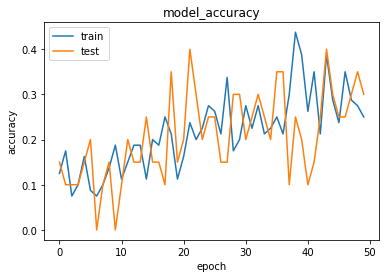

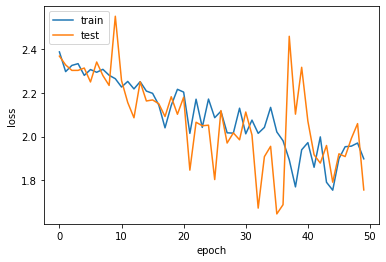

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
loss, accuracy, f1_score, precision, recall = model.evaluate_generator(generator=valid_batches,verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
2500/2500 [==============================] - 128s 51ms/step - loss: 1.8333 - accuracy: 0.3358 - f1_m: 0.0737 - precision_m: 0.1708 - recall_m: 0.0478


In [14]:
from numba import cuda
cuda.select_device(0)
cuda.close()